# Objectives

The main objective of this analysis is to construct a linear model that predicts the filesize of a matplotlib plot given the dpi.

## Features

1. DPI (Dots Per Inch)
2. Filesize (Bytes)
3. Number of Points (Number of Points used in the plot)

## Methodology

1. Generate random value for 100, 1000, and 10000 points stored in:
    - random_points_100.csv
    - random_points_1000.csv
    - random_points_10000.csv


2. Generated plots of dpi 10-999 using varying numbers of random points as specified in (1).


3. Generate linear model based on the data obtained.

In [1]:
import model

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

### Retrieving the data.

In [4]:
m = model.Model()

In [5]:
plot_df = m.data

In [6]:
plot_df

,dpi,filesize,num_points
0,389,17823,100
1,631,43333,100
2,702,53114,100
3,443,22478,100
4,517,29574,100
...,...,...,...
2965,977,98849,10000
2966,203,5877,10000
2967,736,57897,10000
2968,602,38317,10000


In [7]:
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 3 columns):
dpi           2970 non-null int64
filesize      2970 non-null int64
num_points    2970 non-null int64
dtypes: int64(3)
memory usage: 69.7 KB


There are no null or n/a values in the data.

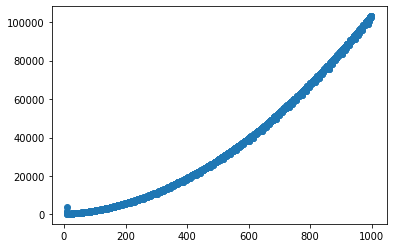

In [8]:
plt.scatter(plot_df['dpi'], plot_df['filesize'])

From the plot it is clear that the relationship between dpi and filesize is not linear. It should also be noted that there seems to be some anomalies where the dpi is close to zero. 

We would first look at the anomalies and than re-express the filesize in an attempt to make the relationship between dpi and filesize linear.

## Examining the Anomaly

In [9]:
plot_df[plot_df['dpi'] < 20].sort_values('filesize', ascending=False)

,dpi,filesize,num_points
699,10,3781,100
1862,10,1670,1000
2363,10,823,10000
35,19,365,100
1025,19,365,1000
2015,19,365,10000
84,18,355,100
2064,18,355,10000
1074,18,355,1000
2394,17,346,10000


The filesize seems to be unusually large at 10 dpi. The set of points with 10 dpi shows a negative relationship between filesize and number of points in the plot. This is clearly wrong as one would expect the relationship between filesize and number of points to be positive. Therefore The set of points with dpi of 10 will be removed from the data.

In [10]:
plot_df = plot_df.drop(plot_df[plot_df['dpi'] == 10].index)
plot_df

,dpi,filesize,num_points
0,389,17823,100
1,631,43333,100
2,702,53114,100
3,443,22478,100
4,517,29574,100
...,...,...,...
2965,977,98849,10000
2966,203,5877,10000
2967,736,57897,10000
2968,602,38317,10000


## Constructing the Linear Model

We will re-express filesize as the square root of filesize.

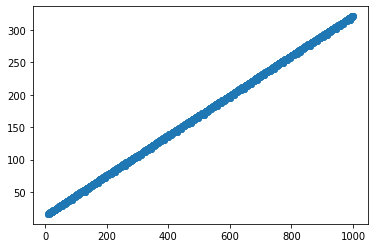

In [11]:
plt.scatter(plot_df['dpi'], np.power(plot_df['filesize'],1/2))

There is a linear relationship between dpi and the square root of filesize. It should also be noted that the number of points on the plot doesn't seem to affect the filesize. Though further analysis would be needed to determine that.

In [12]:
import statsmodels.api as sm

In [13]:
y = np.power(plot_df['filesize'], 1/2)

In [17]:
x = plot_df['dpi']
x = sm.add_constant(x)

C:\Users\chia_\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [18]:
lm = sm.OLS(y,x)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               filesize   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.117e+07
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:24:38   Log-Likelihood:                -3341.0
No. Observations:                2967   AIC:                             6686.
Df Residuals:                    2965   BIC:                             6698.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6108      0.028    488.860      0.000      13.556      13.665
dpi            0.3080    4.8e-05   6416.720      0.000       0.308       0.308
==============================================================================
Omnibus:                     1177.775   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4668.520
Skew:                          -1.955   Prob(JB):                         0.00
Kurtosis:                       7.741   Cond. No.                     1.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The $R^2$ is 1 with $s_e$ of $4.8e^{-0.5}$

The results show that:

$b_0 = 13.6108$

$b_1 = 0.3080$

The linear model is therefore:

$\sqrt{\hat{filesize}} = 13.6108 + 0.3080 dpi$

The linear model shows that the square root of filesize increases by 0.3080 when dpi is increased by 1.